# More Titanic? More Titanic.

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [153]:
# first, need our imports and to grab the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [154]:
# Let's look and remember what's in the data
df= pd.read_csv('data/titanic.csv')

In [155]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [156]:
# Need to grab last names ... but how?
last_name_split = df['Name'].str.split(',')

In [157]:
Last = df['Name'].str.split(', ').map(lambda x: x[0])

In [158]:
last_names_option = pd.Series(name[0] for name in df['Name'].str.split(', ') )

`groupby` or `value_counts`?

In [159]:
Grouping = last_names_option.value_counts()
Lasts = last_names_option.value_counts().head(8)
Grouping

Andersson      9
Sage           7
Johnson        6
Goodwin        6
Skoog          6
              ..
Ilmakangas     1
Ward           1
Ross           1
Francatelli    1
Molson         1
Length: 667, dtype: int64

Now let's visualize:

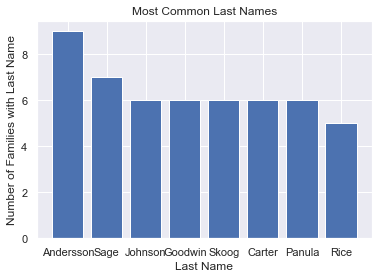

In [160]:
# Plot a bar graph of the most common last names
plt.bar(Lasts.index, Lasts)
plt.title('Most Common Last Names')
plt.xlabel('Last Name')
plt.ylabel('Number of Families with Last Name')
plt.show()

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [161]:
df.loc[df['Fare'] ==df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [162]:
df.loc[df['Fare'] ==df['Fare'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [163]:
df.sort_values(by='Fare',ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


And let's visualize some more!

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

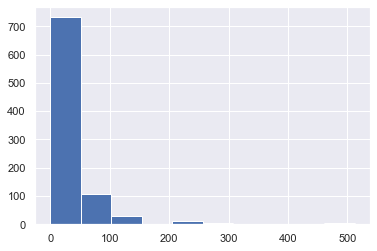

In [164]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])


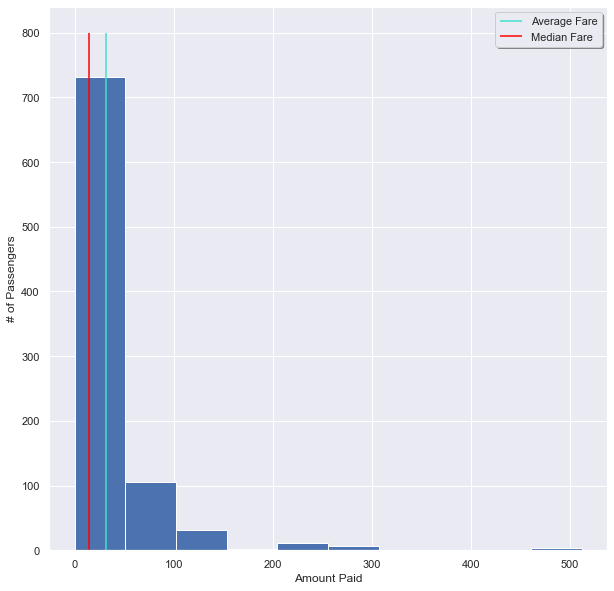

In [165]:
# Okay that's pretty bland, let's see if we can add more detail
plt.figure(figsize=(10,10))
plt.hist(df['Fare'])
plt.xlabel('Amount Paid')
plt.ylabel('# of Passengers')
plt.vlines(df['Fare'].mean(),0,800,label='Average Fare',color = "turquoise")
plt.vlines(df['Fare'].median(),0,800,label='Median Fare',color = "red")
plt.legend(fancybox=True, shadow=True)
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [166]:
import seaborn as sns
sns.set(style='darkgrid')
tips = sns.load_dataset("tips")
# Same as sns.set_style('darkgrid')

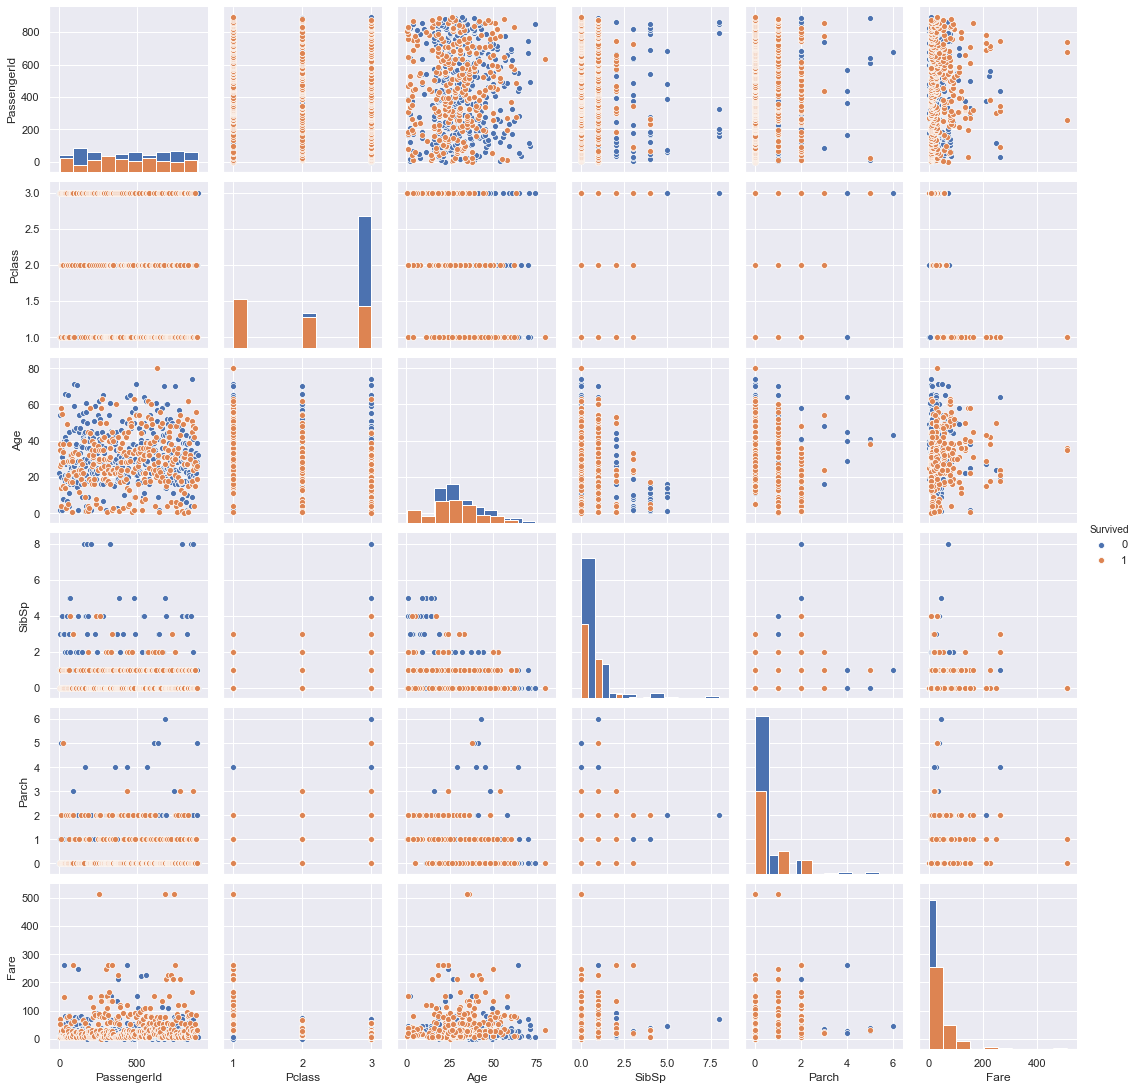

In [170]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df, hue='Survived', diag_kind='hist')

In [ ]:
# Try out a swarm plot with class and age
sns.swarmplot('Pclass','Age', data=df,hue='Survived')

In [ ]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot('Pclass','Age',data=df,col='Survived')